# Bibliotecas

In [1]:
# Tratamento de Dataframes
import pandas as pd
import numpy as np

# Gráficos
import seaborn as sns
import matplotlib.pyplot as plt

# Machine Learning 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler 

from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm 
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import f1_score, classification_report, confusion_matrix
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sklearn.metrics

In [2]:
dataframe = pd.read_csv('data.csv')

In [3]:
dataframe.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
# Separando DataFrame em x e Y

In [5]:
Y = dataframe.diagnosis

In [6]:
lista = ['id', 'Unnamed: 32', 'diagnosis']
x = dataframe.drop(lista, axis=1)

In [7]:
Y.isnull().any().any() # Verificando se há valores nulos nos valores-alvo

False

In [8]:
x.isnull().any().any() # Verificando se há valores nulos nos dados de entrada

False

In [9]:
# Verificação de correlação entre variáveis. Se tiverem muita correlação, pode ser indício de
# multicolinearidade, que pode levar a resultados distorcidos.

<AxesSubplot:>

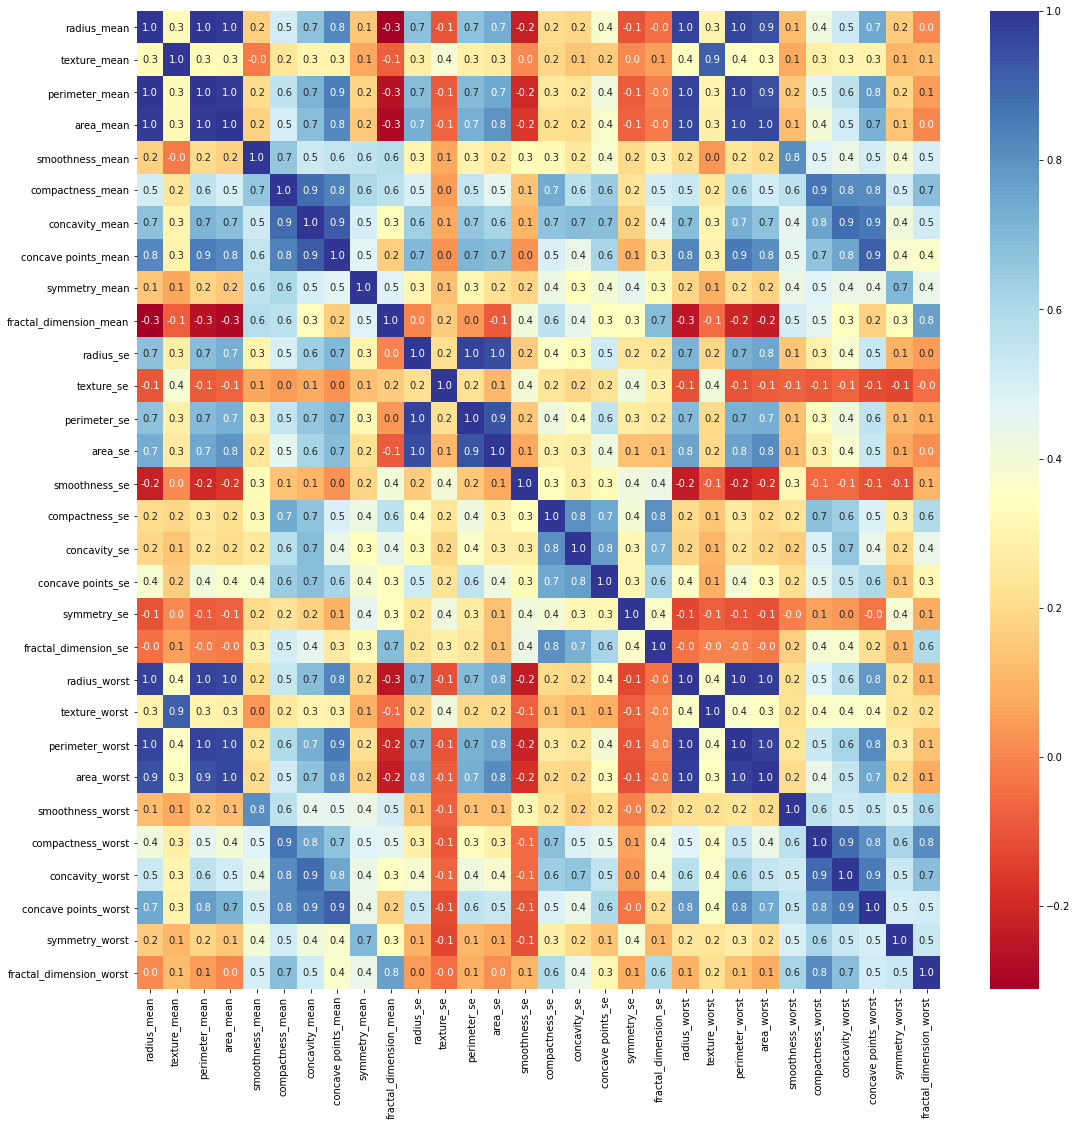

In [10]:
f, ax = plt.subplots(figsize=(18, 18))
sns.heatmap(x.corr(), annot=True, fmt= '.1f', cmap ='RdYlBu')

In [11]:
# Quanto mais variáveis correlacionadas o DataFrame tiver, menor a importância de todas
# elas simultaneamente. É como se as variáveis colineares repartissem a importância entre elas.

## Seleção das Variáveis mais Importantes

In [12]:
# Para lidar com o problema de multicolinearidade, a abordagem escolhida foi identificar
# as variáveis altamente correlacionadas usando o método VIF e deletá-las do dataframe.
# Considerei VIF >= 100 como limiar (arbitrária) para seleção das variáveis mais
# correlacionadas.

In [13]:
vif_dataframe = pd.DataFrame()
vif_dataframe["variavel"] = x.columns

vif_dataframe['vif'] = [variance_inflation_factor(x.values, i)
                          for i in range(len(x.columns))]
print(vif_dataframe)

                   variavel           vif
0               radius_mean  63306.172036
1              texture_mean    251.047108
2            perimeter_mean  58123.586079
3                 area_mean   1287.262339
4           smoothness_mean    393.398166
5          compactness_mean    200.980354
6            concavity_mean    157.855046
7       concave points_mean    154.241268
8             symmetry_mean    184.426558
9    fractal_dimension_mean    629.679874
10                radius_se    236.665738
11               texture_se     24.675367
12             perimeter_se    211.396334
13                  area_se     72.466468
14            smoothness_se     26.170243
15           compactness_se     44.919651
16             concavity_se     33.244099
17        concave points_se     53.698656
18              symmetry_se     37.176452
19     fractal_dimension_se     27.532631
20             radius_worst   9674.742602
21            texture_worst    343.004387
22          perimeter_worst   4487

In [14]:
dataframe_variaveis_alta_corr = vif_dataframe[~(vif_dataframe['vif'] <= 100)]  

In [15]:
dataframe_variaveis_alta_corr

,variavel,vif
0,radius_mean,63306.172036
1,texture_mean,251.047108
2,perimeter_mean,58123.586079
3,area_mean,1287.262339
4,smoothness_mean,393.398166
5,compactness_mean,200.980354
6,concavity_mean,157.855046
7,concave points_mean,154.241268
8,symmetry_mean,184.426558
9,fractal_dimension_mean,629.679874


In [16]:
variaveis_menos_importantes = dataframe_variaveis_alta_corr.variavel

In [17]:
variaveis_menos_importantes

0                 radius_mean
1                texture_mean
2              perimeter_mean
3                   area_mean
4             smoothness_mean
5            compactness_mean
6              concavity_mean
7         concave points_mean
8               symmetry_mean
9      fractal_dimension_mean
10                  radius_se
12               perimeter_se
20               radius_worst
21              texture_worst
22            perimeter_worst
23                 area_worst
24           smoothness_worst
25          compactness_worst
27       concave points_worst
28             symmetry_worst
29    fractal_dimension_worst
Name: variavel, dtype: object

In [18]:
x = x.drop(variaveis_menos_importantes, axis = 1) # Removendo variáveis menos importantes

<AxesSubplot:>

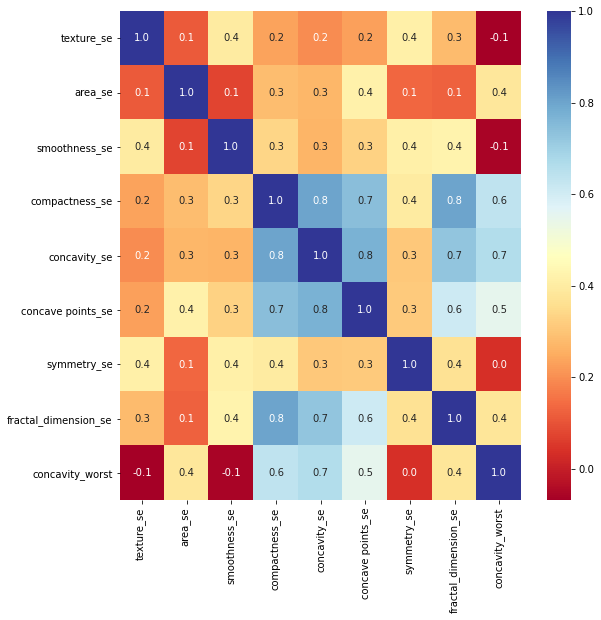

In [19]:
f, ax = plt.subplots(figsize=(9, 9))
sns.heatmap(x.corr(), annot=True, fmt= '.1f', cmap ='RdYlBu')

In [20]:
# Normalizando os dados com MinMaxScaler para que os valores fiquem na mesma escala:

In [21]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(x) 

In [22]:
# Separação dos dados em treino (70%) e teste (30%) e estratificando para minimizar
# a variabilidade entre os dados:

In [23]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, stratify=Y,
                                                    test_size=0.3, random_state=10)

In [24]:
print('Quantidade de registros para treino: ', x_train.shape[0]) 
print('Quantidade de registros para teste: ', x_test.shape[0])

Quantidade de registros para treino:  398
Quantidade de registros para teste:  171


# Implementando Algoritmos de Classificação

## SVM

In [25]:
clf_svm = svm.SVC(kernel='linear')
clf_svm.fit(x_train, y_train)

SVC(kernel='linear')

In [26]:
clf_svm.predict(x_test)

array(['B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B',
       'B', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B',
       'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B',
       'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'M',
       'B', 'M', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'M', 'B', 'B',
       'B', 'B', 'M', 'B', 'M', 'M', 'M', 'M', 'B', 'M', 'M', 'M', 'B',
       'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B',
       'M', 'M', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B',
       'B', 'B', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'M', 'B',
       'M', 'B'], dtype=object)

## Árvore de Decisão

In [27]:
clf_dec = DecisionTreeClassifier()
clf_dec.fit(x_train, y_train)

DecisionTreeClassifier()

In [28]:
clf_dec.predict(x_test)

array(['B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B',
       'B', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B',
       'M', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B',
       'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M',
       'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B',
       'M', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'M',
       'B', 'M', 'B', 'M', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'B',
       'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'M', 'B', 'B',
       'M', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'M', 'M', 'M', 'B',
       'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'M', 'B',
       'M', 'M', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B',
       'B', 'B', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'M', 'M',
       'M', 'B'], dtype=object)

## Naive Bayes

In [29]:
clf_gnb = GaussianNB()
clf_gnb.fit(x_train, y_train)

GaussianNB()

In [30]:
clf_gnb.predict(x_test)

array(['B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'M', 'B',
       'B', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B',
       'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M',
       'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B',
       'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'M',
       'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'M',
       'M', 'B', 'M', 'B', 'M', 'M', 'M', 'M', 'B', 'M', 'M', 'M', 'B',
       'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M',
       'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'B',
       'M', 'M', 'B', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'B',
       'B', 'B', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'M', 'M',
       'M', 'B'], dtype='<U1')

## Regressão Logística

In [31]:
clf_log = LogisticRegression()
clf_log.fit(x_train, y_train)

LogisticRegression()

In [32]:
clf_log.predict(x_test)

array(['B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B',
       'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B',
       'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B',
       'M', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'M',
       'B', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'M', 'B', 'B',
       'B', 'B', 'M', 'B', 'M', 'M', 'M', 'M', 'B', 'M', 'M', 'M', 'B',
       'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B',
       'M', 'M', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'M', 'B',
       'B', 'B'], dtype=object)

## K-nearest neighbor

In [33]:
acuracia_treino = []
k_set = range(1,15)

In [34]:
for n_neighbors in k_set:
  knn = KNeighborsClassifier(n_neighbors=n_neighbors)
  scores = cross_val_score(knn, x_train, y_train, cv=10) #testa eficacia com cross validation
  acuracia_treino.append(scores.mean())

In [35]:
melhor_k = np.argmax(acuracia_treino) 
print('Melhor k no treinamento com Cross Validation: ', k_set[melhor_k])

Melhor k no treinamento com Cross Validation:  13


In [36]:
acuracia_teste = []

In [37]:
for n_neighbors in k_set:
  knn = KNeighborsClassifier(n_neighbors=n_neighbors)
  knn.fit(x_train, y_train)
  y_pred = knn.predict(x_test) 
  acuracia_teste.append(sklearn.metrics.accuracy_score(y_test, y_pred)) #compara y_test com y_pred

In [38]:
melhor_k =np.argmax(acuracia_teste)
print('Melhor k nos testes: ', k_set[melhor_k])

Melhor k nos testes:  5


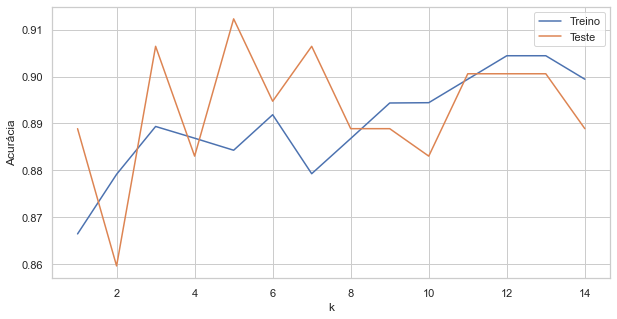

In [39]:
sns.set(style = 'whitegrid')
f, ax = plt.subplots(figsize=(10, 5))

plt.plot(k_set, acuracia_treino, label='Treino')
plt.plot(k_set, acuracia_teste, label='Teste')
plt.ylabel('Acurácia')
plt.xlabel('k')
plt.legend()

plt.show()

In [40]:
clf_knn = KNeighborsClassifier(n_neighbors = k_set[melhor_k])
clf_knn.fit(x_train, y_train)

KNeighborsClassifier()

In [41]:
clf_knn.predict(x_test)

array(['B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B',
       'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B',
       'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B',
       'M', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'M',
       'B', 'M', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'M', 'B', 'B',
       'B', 'B', 'B', 'B', 'M', 'M', 'M', 'M', 'B', 'M', 'M', 'M', 'B',
       'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'M', 'B', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'B',
       'B', 'B', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'M', 'B',
       'M', 'B'], dtype=object)

# Avaliação dos Modelos Preditivos

## Scores

In [42]:
print(clf_svm.score(x_test, y_test))
print(clf_dec.score(x_test, y_test))
print(clf_gnb.score(x_test, y_test))
print(clf_log.score(x_test, y_test))
print(clf_knn.score(x_test, y_test))

0.9181286549707602
0.8947368421052632
0.9005847953216374
0.8713450292397661
0.9122807017543859


## Avaliação dos F1 - Scores

In [43]:
print(f1_score(y_test, clf_svm.predict(x_test), average=None, labels = ['B', 'M']))
print(f1_score(y_test, clf_dec.predict(x_test), average=None, labels = ['B', 'M']))
print(f1_score(y_test, clf_gnb.predict(x_test), average=None, labels = ['B', 'M']))
print(f1_score(y_test, clf_log.predict(x_test), average=None, labels = ['B', 'M']))
print(f1_score(y_test, clf_knn.predict(x_test), average=None, labels = ['B', 'M']))

[0.93636364 0.8852459 ]
[0.91509434 0.86153846]
[0.91866029 0.87218045]
[0.90350877 0.80701754]
[0.9321267  0.87603306]


In [44]:
# clf_svm obteve o melhor f1 score.

# Matriz de confusão e Classification Report

In [45]:
y_pred = clf_svm.predict(x_test)

<AxesSubplot:>

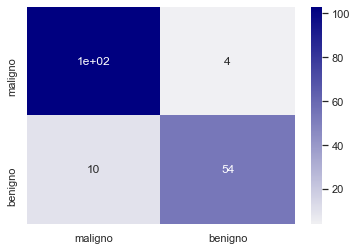

In [46]:
matriz_confusao = sklearn.metrics.confusion_matrix(y_test, y_pred)

df_matriz_confusao = pd.DataFrame(matriz_confusao, index = [i for i in ['maligno', 'benigno']],
                                  columns = [i for i in ['maligno', 'benigno']])

cmap = sns.light_palette("navy", as_cmap=True)
plt.figure()
sns.heatmap(df_matriz_confusao, annot=True, cmap=cmap)

In [47]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           B       0.91      0.96      0.94       107
           M       0.93      0.84      0.89        64

    accuracy                           0.92       171
   macro avg       0.92      0.90      0.91       171
weighted avg       0.92      0.92      0.92       171



In [48]:
# O melhor modelo identificou 10 casos como sendo benignos quando na verdade eram malignos,
# e quatro casos como malignos quando eram na realidade benignos.

# Aperfeiçoando Modelo

In [ ]:
# Utilizando o GridSearchCV para identificar os melhores parâmetros para o classificador SVC 

In [49]:
parametros = {'kernel' : ('linear', 'rbf'), 'C': (1, 4, 8, 16, 32)}

In [50]:
svc = svm.SVC()
clf_svm_aperfeicoado = GridSearchCV(svc, parametros, cv=5)
clf_svm_aperfeicoado.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': (1, 4, 8, 16, 32), 'kernel': ('linear', 'rbf')})

In [51]:
print(clf_svm_aperfeicoado.score(x_test, y_test))

0.9590643274853801


In [52]:
y_pred_ap = clf_svm_aperfeicoado.predict(x_test)

<AxesSubplot:>

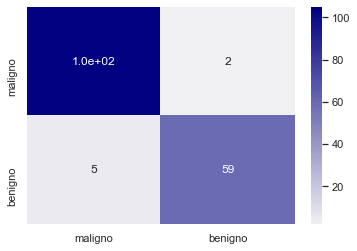

In [53]:
matriz_confusao_ap = sklearn.metrics.confusion_matrix(y_test, y_pred_ap)

df_matriz_confusao_ap = pd.DataFrame(matriz_confusao_ap, index = [i for i in ['maligno', 'benigno']],
                                      columns = [i for i in ['maligno', 'benigno']])

cmap = sns.light_palette("navy", as_cmap=True)
plt.figure()
sns.heatmap(df_matriz_confusao_ap, annot=True, cmap=cmap)

In [54]:
print(classification_report(y_test, y_pred_ap))

              precision    recall  f1-score   support

           B       0.95      0.98      0.97       107
           M       0.97      0.92      0.94        64

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



In [ ]:
# A acurácia do modelo subiu para 96% e a quantidade de falsos positivos e falsos negativos foi reduzida

# Criando Interface para Classificador 

In [55]:
import gradio as gr

In [56]:
atributos = x.columns.tolist()

In [57]:
atributos

['texture_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'concavity_worst']

In [58]:
inputs_atributos = []
for a in atributos:
  obj_input = gr.inputs.Number(label=a)
  inputs_atributos.append(obj_input)

In [59]:
inputs_atributos

[Number(label="texture_se"),
 Number(label="area_se"),
 Number(label="smoothness_se"),
 Number(label="compactness_se"),
 Number(label="concavity_se"),
 Number(label="concave points_se"),
 Number(label="symmetry_se"),
 Number(label="fractal_dimension_se"),
 Number(label="concavity_worst")]

In [60]:
# Criando a interface e a função predict.

In [61]:
def predict(*output_atributos):
    output_atributos = np.array(output_atributos).reshape(1, -1)
    return clf_svm_aperfeicoado.predict(output_atributos)

In [62]:
iface = gr.Interface(
                    fn = predict,
                    title = "Predição de Câncer de Mama",
                    description = "Sistema para detecção do tipo (benigno ou maligno) de Câncer de Mama.",
                    inputs = inputs_atributos,
                    outputs="text")
iface.launch(share=True)

Running locally at: http://127.0.0.1:7860/
This share link will expire in 24 hours. If you need a permanent link, visit: https://gradio.app/introducing-hosted (NEW!)
Running on External URL: https://27052.gradio.app
Interface loading below...


(<Flask 'gradio.networking'>,
 'http://127.0.0.1:7860/',
 'https://27052.gradio.app')